In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [3]:
df = pd.read_csv('fix.csv')
df.head()

,Domain,Area,Element,Item,Year,Prod_Unit,Production_Value,Price_Unit,Price_Value,Import_Unit,Import_Q,Export_Unit,Export_Q,Temp_Change_Unit,Temp_Change_Value
0,Crops,Brunei Darussalam,Area harvested,Bananas,2000,ha,140.0,USD,823.70,tonnes,50.0,tonnes,0.0,Â°C,0.448
1,Crops,Brunei Darussalam,Area harvested,Bananas,2000,ha,140.0,PriceIndex,74.43,tonnes,50.0,tonnes,0.0,Â°C,0.448
2,Crops,Brunei Darussalam,Production,Bananas,2000,tonnes,542.0,USD,823.70,tonnes,50.0,tonnes,0.0,Â°C,0.448
3,Crops,Brunei Darussalam,Production,Bananas,2000,tonnes,542.0,PriceIndex,74.43,tonnes,50.0,tonnes,0.0,Â°C,0.448
4,Livestock Primary,Brunei Darussalam,Laying,"Eggs, hen, in shell",2000,1000 Head,1200.0,USD,1628.20,tonnes,600.0,tonnes,0.0,Â°C,0.448


In [4]:
# df4 = pd.read_csv('eximp.csv')
# df4.head()

In [5]:
df2 = df.loc[(df['Prod_Unit'].isin(['tonnes']) & (df['Price_Unit'] == 'PriceIndex'))]
df2.head()

,Domain,Area,Element,Item,Year,Prod_Unit,Production_Value,Price_Unit,Price_Value,Import_Unit,Import_Q,Export_Unit,Export_Q,Temp_Change_Unit,Temp_Change_Value
3,Crops,Brunei Darussalam,Production,Bananas,2000,tonnes,542.0,PriceIndex,74.43,tonnes,50.0,tonnes,0.0,Â°C,0.448
7,Livestock Primary,Brunei Darussalam,Production,"Eggs, hen, in shell",2000,tonnes,4800.0,PriceIndex,77.12,tonnes,600.0,tonnes,0.0,Â°C,0.448
11,Livestock Primary,Brunei Darussalam,Production,"Meat, cattle",2000,tonnes,3210.0,PriceIndex,41.24,tonnes,20.0,tonnes,0.0,Â°C,0.448
15,Livestock Primary,Brunei Darussalam,Production,"Meat, chicken",2000,tonnes,11256.0,PriceIndex,95.22,tonnes,920.0,tonnes,17.0,Â°C,0.448
19,Livestock Primary,Brunei Darussalam,Production,"Milk, whole fresh cow",2000,tonnes,95.0,PriceIndex,67.22,tonnes,1100.0,tonnes,0.0,Â°C,0.448


In [6]:
df2.rename(columns={"Price_Value":"Price_Index"}, inplace=True)
df2.drop(['Price_Unit'], axis=1, inplace=True)
df2.head()

,Domain,Area,Element,Item,Year,Prod_Unit,Production_Value,Price_Index,Import_Unit,Import_Q,Export_Unit,Export_Q,Temp_Change_Unit,Temp_Change_Value
3,Crops,Brunei Darussalam,Production,Bananas,2000,tonnes,542.0,74.43,tonnes,50.0,tonnes,0.0,Â°C,0.448
7,Livestock Primary,Brunei Darussalam,Production,"Eggs, hen, in shell",2000,tonnes,4800.0,77.12,tonnes,600.0,tonnes,0.0,Â°C,0.448
11,Livestock Primary,Brunei Darussalam,Production,"Meat, cattle",2000,tonnes,3210.0,41.24,tonnes,20.0,tonnes,0.0,Â°C,0.448
15,Livestock Primary,Brunei Darussalam,Production,"Meat, chicken",2000,tonnes,11256.0,95.22,tonnes,920.0,tonnes,17.0,Â°C,0.448
19,Livestock Primary,Brunei Darussalam,Production,"Milk, whole fresh cow",2000,tonnes,95.0,67.22,tonnes,1100.0,tonnes,0.0,Â°C,0.448


In [7]:
df3 = df.loc[(df['Prod_Unit'].isin(['tonnes']) & (df['Price_Unit'] == 'USD'))]
df3

,Domain,Area,Element,Item,Year,Prod_Unit,Production_Value,Price_Unit,Price_Value,Import_Unit,Import_Q,Export_Unit,Export_Q,Temp_Change_Unit,Temp_Change_Value
2,Crops,Brunei Darussalam,Production,Bananas,2000,tonnes,542.0,USD,823.7,tonnes,50.0,tonnes,0.0,Â°C,0.448
6,Livestock Primary,Brunei Darussalam,Production,"Eggs, hen, in shell",2000,tonnes,4800.0,USD,1628.2,tonnes,600.0,tonnes,0.0,Â°C,0.448
10,Livestock Primary,Brunei Darussalam,Production,"Meat, cattle",2000,tonnes,3210.0,USD,3816.8,tonnes,20.0,tonnes,0.0,Â°C,0.448
14,Livestock Primary,Brunei Darussalam,Production,"Meat, chicken",2000,tonnes,11256.0,USD,2807.5,tonnes,920.0,tonnes,17.0,Â°C,0.448
18,Livestock Primary,Brunei Darussalam,Production,"Milk, whole fresh cow",2000,tonnes,95.0,USD,1450.1,tonnes,1100.0,tonnes,0.0,Â°C,0.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496,Livestock Primary,Viet Nam,Production,"Meat, chicken",2013,tonnes,575752.0,USD,4515.7,tonnes,115187.0,tonnes,72.0,Â°C,0.926
4502,Crops,Viet Nam,Production,Maize,2018,tonnes,4874054.0,USD,263.0,tonnes,10377637.0,tonnes,80999.0,Â°C,0.904
4506,Crops,Viet Nam,Production,"Rice, paddy",2018,tonnes,44046250.0,USD,282.7,tonnes,5124.0,tonnes,2592.0,Â°C,0.904
4510,Livestock Primary,Viet Nam,Production,"Eggs, hen, in shell",2018,tonnes,582280.0,USD,1431.5,tonnes,16.0,tonnes,1653.0,Â°C,0.904


In [8]:
df4 = pd.merge(df2, df3, how='inner', on=['Domain', 'Area', 'Element', 'Item', 'Year', 'Prod_Unit', 'Production_Value', 'Import_Unit', 'Import_Q', 'Export_Unit', 'Export_Q', 'Temp_Change_Unit', 'Temp_Change_Value'])
df4

,Domain,Area,Element,Item,Year,Prod_Unit,Production_Value,Price_Index,Import_Unit,Import_Q,Export_Unit,Export_Q,Temp_Change_Unit,Temp_Change_Value,Price_Unit,Price_Value
0,Crops,Brunei Darussalam,Production,Bananas,2000,tonnes,542.0,74.43,tonnes,50.0,tonnes,0.0,Â°C,0.448,USD,823.7
1,Livestock Primary,Brunei Darussalam,Production,"Eggs, hen, in shell",2000,tonnes,4800.0,77.12,tonnes,600.0,tonnes,0.0,Â°C,0.448,USD,1628.2
2,Livestock Primary,Brunei Darussalam,Production,"Meat, cattle",2000,tonnes,3210.0,41.24,tonnes,20.0,tonnes,0.0,Â°C,0.448,USD,3816.8
3,Livestock Primary,Brunei Darussalam,Production,"Meat, chicken",2000,tonnes,11256.0,95.22,tonnes,920.0,tonnes,17.0,Â°C,0.448,USD,2807.5
4,Livestock Primary,Brunei Darussalam,Production,"Milk, whole fresh cow",2000,tonnes,95.0,67.22,tonnes,1100.0,tonnes,0.0,Â°C,0.448,USD,1450.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,Livestock Primary,Viet Nam,Production,"Meat, chicken",2013,tonnes,575752.0,101.28,tonnes,115187.0,tonnes,72.0,Â°C,0.926,USD,4515.7
882,Crops,Viet Nam,Production,Maize,2018,tonnes,4874054.0,88.55,tonnes,10377637.0,tonnes,80999.0,Â°C,0.904,USD,263.0
883,Crops,Viet Nam,Production,"Rice, paddy",2018,tonnes,44046250.0,102.60,tonnes,5124.0,tonnes,2592.0,Â°C,0.904,USD,282.7
884,Livestock Primary,Viet Nam,Production,"Eggs, hen, in shell",2018,tonnes,582280.0,66.73,tonnes,16.0,tonnes,1653.0,Â°C,0.904,USD,1431.5


In [9]:
# df7 = pd.merge(df6, df4, how='inner', on=['Area', 'Item', 'Year'])
# df7.head()

In [10]:
df4['Item'].unique()

array(['Bananas', 'Eggs, hen, in shell', 'Meat, cattle', 'Meat, chicken',
       'Milk, whole fresh cow', 'Rice, paddy', 'Maize', 'Onions, dry',
       'Meat, sheep', 'Oil palm fruit', 'Garlic', 'Meat, duck',
       'Meat, goat', 'Onions, shallots, green', 'Cassava'], dtype=object)

In [11]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 885
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Domain             886 non-null    object 
 1   Area               886 non-null    object 
 2   Element            886 non-null    object 
 3   Item               886 non-null    object 
 4   Year               886 non-null    int64  
 5   Prod_Unit          886 non-null    object 
 6   Production_Value   886 non-null    float64
 7   Price_Index        886 non-null    float64
 8   Import_Unit        886 non-null    object 
 9   Import_Q           882 non-null    float64
 10  Export_Unit        886 non-null    object 
 11  Export_Q           852 non-null    float64
 12  Temp_Change_Unit   886 non-null    object 
 13  Temp_Change_Value  843 non-null    float64
 14  Price_Unit         886 non-null    object 
 15  Price_Value        886 non-null    float64
dtypes: float64(6), int64(1), o

In [12]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,886.0,2.008523e+03,5.233643e+00,2000.000,2004.0000,2008.000,2.013000e+03,2.018000e+03
Production_Value,886.0,6.326560e+06,1.858241e+07,37.000,52724.0000,371572.500,1.942986e+06,1.487088e+08
Price_Index,886.0,7.542011e+01,2.639291e+01,11.940,56.8175,76.090,9.480750e+01,1.690600e+02
Import_Q,882.0,1.685158e+05,7.374276e+05,0.000,147.0000,2672.500,3.572550e+04,1.037764e+07
Export_Q,852.0,5.284738e+05,2.882171e+06,0.000,18.0000,875.000,1.784325e+04,2.789368e+07
Temp_Change_Value,843.0,7.152515e-01,2.932487e-01,0.014,0.5410,0.666,8.720000e-01,1.566000e+00
Price_Value,886.0,1.515471e+03,1.759956e+03,21.300,251.4250,861.300,2.161025e+03,9.267200e+03


In [13]:
df4.describe(include='O').T

,count,unique,top,freq
Domain,886,2,Livestock Primary,450
Area,886,9,Thailand,201
Element,886,1,Production,886
Item,886,15,"Meat, chicken",116
Prod_Unit,886,1,tonnes,886
Import_Unit,886,1,tonnes,886
Export_Unit,886,1,tonnes,886
Temp_Change_Unit,886,1,Â°C,886
Price_Unit,886,1,USD,886


In [14]:
df4.isna().sum()

Domain                0
Area                  0
Element               0
Item                  0
Year                  0
Prod_Unit             0
Production_Value      0
Price_Index           0
Import_Unit           0
Import_Q              4
Export_Unit           0
Export_Q             34
Temp_Change_Unit      0
Temp_Change_Value    43
Price_Unit            0
Price_Value           0
dtype: int64

In [15]:
df4['Import_Q'].fillna(df4['Import_Q'].mean(), inplace=True)

In [16]:
df4['Export_Q'].fillna(df4['Export_Q'].mean(), inplace=True)

In [17]:
df4['Temp_Change_Value'].fillna(df4['Temp_Change_Value'].mean(), inplace=True)

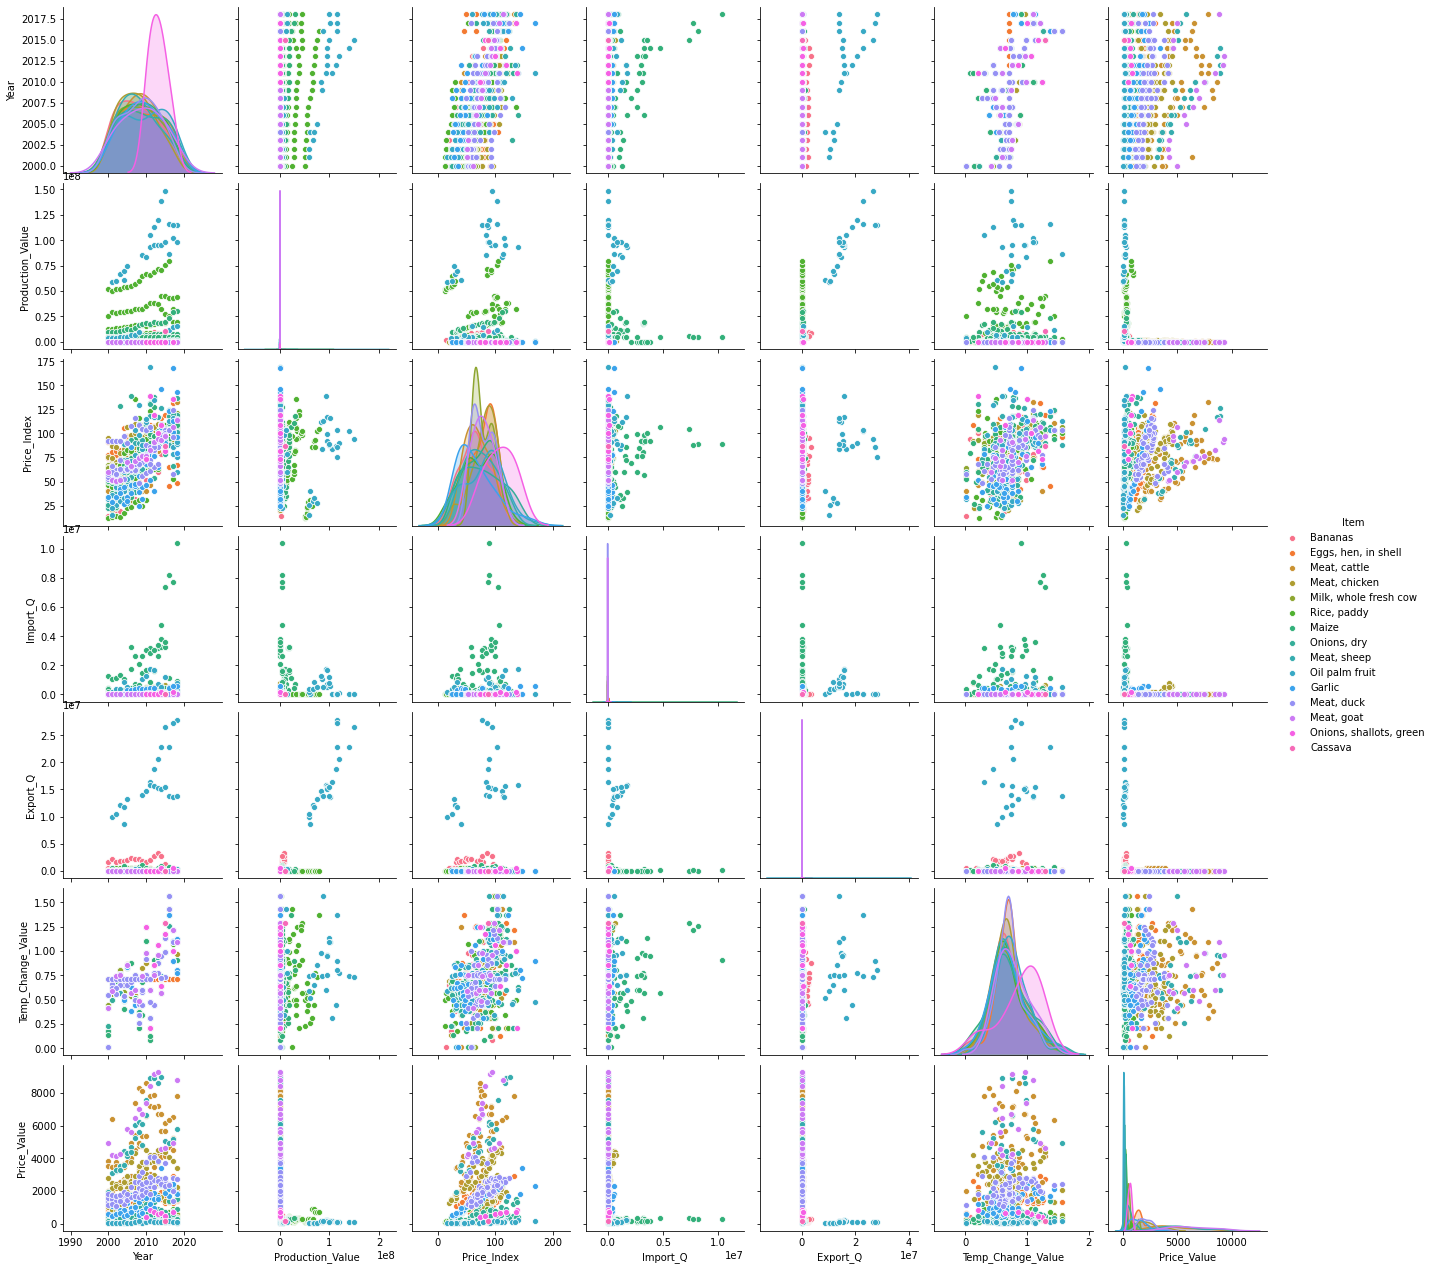

In [18]:
sns.pairplot(df4, hue='Item')

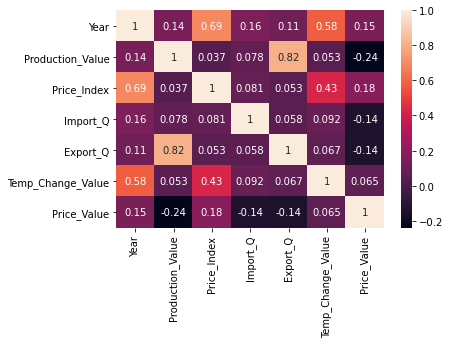

In [19]:
dfc=df4.corr()
sns.heatmap(dfc, annot=True)

In [20]:
# dfc1=df7.corr()
# sns.heatmap(dfc1, annot=True)

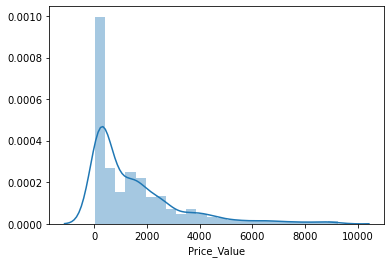

In [21]:
sns.distplot(df4['Price_Value'])

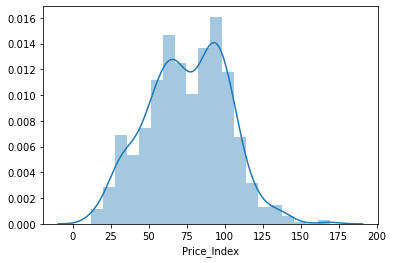

In [22]:
sns.distplot(df4['Price_Index'])

In [23]:
df.groupby('Price_Unit').mean()

,Year,Production_Value,Price_Value,Import_Q,Export_Q,Temp_Change_Value
Price_Unit,,,,,,
PriceIndex,2008.458884,3.265910e+06,74.348443,138364.098655,466814.770342,0.705770
USD,2008.571111,3.738432e+06,1503.273444,167184.933036,521968.620092,0.721932


In [24]:
df.groupby('Domain').mean()

,Year,Production_Value,Price_Value,Import_Q,Export_Q,Temp_Change_Value
Domain,,,,,,
Crops,2008.684793,6.806606e+06,205.398700,295377.315989,1.030499e+06,0.712968
Livestock Primary,2008.336449,3.632885e+05,1046.177647,19299.100255,9.208973e+03,0.711804


In [25]:
df_a1=(pd.crosstab(index=df4['Item'], columns='Avg_PriceIndex', values=df4['Price_Index'], aggfunc='median')).round(2)

df_a1.sort_values(by='Avg_PriceIndex', ascending=False)

col_0,Avg_PriceIndex
Item,
"Onions, shallots, green",109.04
Oil palm fruit,87.60
Cassava,87.14
"Eggs, hen, in shell",85.95
"Meat, chicken",83.79
"Meat, goat",76.25
"Meat, duck",75.34
Maize,74.69
"Milk, whole fresh cow",73.31


In [26]:
df_a2=(pd.crosstab(index=df4['Item'], columns='Avg_PriceValue', values=df4['Price_Value'], aggfunc='mean')).round(2)

df_a2.sort_values(by='Avg_PriceValue', ascending=False)

col_0,Avg_PriceValue
Item,
"Meat, goat",6247.79
"Meat, sheep",5300.12
"Meat, cattle",4572.99
"Meat, chicken",2299.11
"Meat, duck",2172.54
"Eggs, hen, in shell",1526.39
Garlic,1356.14
"Onions, shallots, green",630.73
"Milk, whole fresh cow",605.87


In [27]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 885
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Domain             886 non-null    object 
 1   Area               886 non-null    object 
 2   Element            886 non-null    object 
 3   Item               886 non-null    object 
 4   Year               886 non-null    int64  
 5   Prod_Unit          886 non-null    object 
 6   Production_Value   886 non-null    float64
 7   Price_Index        886 non-null    float64
 8   Import_Unit        886 non-null    object 
 9   Import_Q           886 non-null    float64
 10  Export_Unit        886 non-null    object 
 11  Export_Q           886 non-null    float64
 12  Temp_Change_Unit   886 non-null    object 
 13  Temp_Change_Value  886 non-null    float64
 14  Price_Unit         886 non-null    object 
 15  Price_Value        886 non-null    float64
dtypes: float64(6), int64(1), o

In [28]:
df4.head()

,Domain,Area,Element,Item,Year,Prod_Unit,Production_Value,Price_Index,Import_Unit,Import_Q,Export_Unit,Export_Q,Temp_Change_Unit,Temp_Change_Value,Price_Unit,Price_Value
0,Crops,Brunei Darussalam,Production,Bananas,2000,tonnes,542.0,74.43,tonnes,50.0,tonnes,0.0,Â°C,0.448,USD,823.7
1,Livestock Primary,Brunei Darussalam,Production,"Eggs, hen, in shell",2000,tonnes,4800.0,77.12,tonnes,600.0,tonnes,0.0,Â°C,0.448,USD,1628.2
2,Livestock Primary,Brunei Darussalam,Production,"Meat, cattle",2000,tonnes,3210.0,41.24,tonnes,20.0,tonnes,0.0,Â°C,0.448,USD,3816.8
3,Livestock Primary,Brunei Darussalam,Production,"Meat, chicken",2000,tonnes,11256.0,95.22,tonnes,920.0,tonnes,17.0,Â°C,0.448,USD,2807.5
4,Livestock Primary,Brunei Darussalam,Production,"Milk, whole fresh cow",2000,tonnes,95.0,67.22,tonnes,1100.0,tonnes,0.0,Â°C,0.448,USD,1450.1


In [29]:
df4.drop(['Domain', 'Area','Element','Item','Prod_Unit','Import_Unit','Export_Unit','Temp_Change_Unit','Price_Unit'], axis=1, inplace=True)
df4

,Year,Production_Value,Price_Index,Import_Q,Export_Q,Temp_Change_Value,Price_Value
0,2000,542.0,74.43,50.0,0.0,0.448,823.7
1,2000,4800.0,77.12,600.0,0.0,0.448,1628.2
2,2000,3210.0,41.24,20.0,0.0,0.448,3816.8
3,2000,11256.0,95.22,920.0,17.0,0.448,2807.5
4,2000,95.0,67.22,1100.0,0.0,0.448,1450.1
...,...,...,...,...,...,...,...
881,2013,575752.0,101.28,115187.0,72.0,0.926,4515.7
882,2018,4874054.0,88.55,10377637.0,80999.0,0.904,263.0
883,2018,44046250.0,102.60,5124.0,2592.0,0.904,282.7
884,2018,582280.0,66.73,16.0,1653.0,0.904,1431.5


In [30]:
x = df4.drop(columns='Price_Value')
y = df4['Price_Value']

In [31]:
x_train_LR, x_test_LR, y_train_LR, y_test_LR = train_test_split(x, y, test_size = .20, random_state = 48)

In [32]:
x_train_LR.shape

x_test_LR.shape

(178, 6)

In [33]:
model_LR = LinearRegression()

In [34]:
model_LR.fit(x_train_LR, y_train_LR)

LinearRegression()

In [35]:
model_LR.predict(x_test_LR)

array([-789.82428761, 1593.29214136,  773.55361918,  940.51847507,
       2244.7554289 , 2493.67295559, 1206.10412299, 1777.22097881,
        546.11686164, 1182.66469126, 1978.97564203, 1137.53988395,
       1677.46892959, 1512.32720624, 2297.09889275, -875.50726845,
       2120.54516243,  787.05706682, 1797.28511323, 1616.29499001,
       1036.84366543, 2014.02816098, 1597.08495905, 2107.43260983,
       1133.97700625, 1665.54670352, 1738.94709789, 2009.39455002,
       1724.69994394, 1426.38848818, 1212.82417551, 1025.72010492,
       2140.09643642, 2453.19979863, 1812.79004088, 1822.35858406,
       1219.34770835, 1061.06842095, 2197.66053166, 2148.41354902,
       1498.32513669, 1805.8370602 ,  939.73694369, 2027.82873141,
       1822.79021408, 1900.91760365, 2377.0810055 , 1341.84070456,
       2350.49972023, 1168.8243961 ,  951.51014576, 2397.03353276,
       1877.39106696, 1492.82403777, 1772.35112977, 1834.15814937,
       1318.74504331, 1522.85624673, 2120.45274101, 1236.33394

In [36]:
model_LR.intercept_

-124951.77128921116

In [37]:
model_LR.coef_

array([ 6.29939808e+01, -3.64022574e-05,  7.23740922e+00, -3.34766158e-04,
        9.06208804e-05, -4.52552180e+02])

In [38]:
pd.DataFrame(index= x_train_LR.columns, data = model_LR.coef_, columns=['Coefficient'])

,Coefficient
Year,62.993981
Production_Value,-0.000036
Price_Index,7.237409
Import_Q,-0.000335
Export_Q,0.000091
Temp_Change_Value,-452.552180


In [39]:
pred_train_LR = model_LR.predict(x_train_LR) ### Data Prediksi Model (Training)

MAE_train_LR = median_absolute_error(y_train_LR, pred_train_LR)

MSE_train_LR = mean_squared_error(y_train_LR, pred_train_LR)

RMSE_train_LR = np.sqrt(MSE_train_LR)

R2_train_LR = r2_score(y_train_LR, pred_train_LR)

In [40]:
print("Hasil Evaluasi Data Training ")
print("Nilai MAE : ", MAE_train_LR)
print("Nilai MSE : ", MSE_train_LR)
print("Nilai RMSE : ", RMSE_train_LR)
print("Nilai R2 : ", R2_train_LR)

Hasil Evaluasi Data Training 
Nilai MAE :  977.9756252040651
Nilai MSE :  2918560.872401043
Nilai RMSE :  1708.3796043037516
Nilai R2 :  0.12885304630525873


In [41]:
pred_test_LR = model_LR.predict(x_test_LR) ### Data Prediksi Model (Training)

MAE_test_LR = median_absolute_error(y_test_LR, pred_test_LR)

MSE_test_LR = mean_squared_error(y_test_LR, pred_test_LR)

RMSE_test_LR = np.sqrt(MSE_test_LR)

R2_test_LR = r2_score(y_test_LR, pred_test_LR)

In [42]:
print("Hasil Evaluasi Data Training ")
print("Nilai MAE : ", MAE_test_LR)
print("Nilai MSE : ", MSE_test_LR)
print("Nilai RMSE : ", RMSE_test_LR)
print("Nilai R2 : ", R2_test_LR)

Hasil Evaluasi Data Training 
Nilai MAE :  835.0682089181414
Nilai MSE :  1836057.1503253176
Nilai RMSE :  1355.0118635367432
Nilai R2 :  0.09564794749297678


In [43]:
df5 = pd.merge(df2, df3, how='inner', on=['Domain', 'Area', 'Element', 'Item', 'Year', 'Prod_Unit', 'Production_Value', 'Import_Unit', 'Import_Q', 'Export_Unit', 'Export_Q', 'Temp_Change_Unit', 'Temp_Change_Value'])
df5

,Domain,Area,Element,Item,Year,Prod_Unit,Production_Value,Price_Index,Import_Unit,Import_Q,Export_Unit,Export_Q,Temp_Change_Unit,Temp_Change_Value,Price_Unit,Price_Value
0,Crops,Brunei Darussalam,Production,Bananas,2000,tonnes,542.0,74.43,tonnes,50.0,tonnes,0.0,Â°C,0.448,USD,823.7
1,Livestock Primary,Brunei Darussalam,Production,"Eggs, hen, in shell",2000,tonnes,4800.0,77.12,tonnes,600.0,tonnes,0.0,Â°C,0.448,USD,1628.2
2,Livestock Primary,Brunei Darussalam,Production,"Meat, cattle",2000,tonnes,3210.0,41.24,tonnes,20.0,tonnes,0.0,Â°C,0.448,USD,3816.8
3,Livestock Primary,Brunei Darussalam,Production,"Meat, chicken",2000,tonnes,11256.0,95.22,tonnes,920.0,tonnes,17.0,Â°C,0.448,USD,2807.5
4,Livestock Primary,Brunei Darussalam,Production,"Milk, whole fresh cow",2000,tonnes,95.0,67.22,tonnes,1100.0,tonnes,0.0,Â°C,0.448,USD,1450.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,Livestock Primary,Viet Nam,Production,"Meat, chicken",2013,tonnes,575752.0,101.28,tonnes,115187.0,tonnes,72.0,Â°C,0.926,USD,4515.7
882,Crops,Viet Nam,Production,Maize,2018,tonnes,4874054.0,88.55,tonnes,10377637.0,tonnes,80999.0,Â°C,0.904,USD,263.0
883,Crops,Viet Nam,Production,"Rice, paddy",2018,tonnes,44046250.0,102.60,tonnes,5124.0,tonnes,2592.0,Â°C,0.904,USD,282.7
884,Livestock Primary,Viet Nam,Production,"Eggs, hen, in shell",2018,tonnes,582280.0,66.73,tonnes,16.0,tonnes,1653.0,Â°C,0.904,USD,1431.5


In [44]:
df5.drop(['Area','Element','Item','Prod_Unit','Import_Unit','Export_Unit','Temp_Change_Unit','Price_Unit'], axis=1, inplace=True)


In [45]:
df5['Import_Q'].fillna(df5['Import_Q'].mean(), inplace=True)
df5['Export_Q'].fillna(df5['Export_Q'].mean(), inplace=True)
df5['Temp_Change_Value'].fillna(df5['Temp_Change_Value'].mean(), inplace=True)

In [46]:
df6 = pd.get_dummies(data=df5, columns=['Domain'])

In [47]:
df6.head()

,Year,Production_Value,Price_Index,Import_Q,Export_Q,Temp_Change_Value,Price_Value,Domain_Crops,Domain_Livestock Primary
0,2000,542.0,74.43,50.0,0.0,0.448,823.7,1,0
1,2000,4800.0,77.12,600.0,0.0,0.448,1628.2,0,1
2,2000,3210.0,41.24,20.0,0.0,0.448,3816.8,0,1
3,2000,11256.0,95.22,920.0,17.0,0.448,2807.5,0,1
4,2000,95.0,67.22,1100.0,0.0,0.448,1450.1,0,1


In [48]:
df6.isna().sum()

Year                        0
Production_Value            0
Price_Index                 0
Import_Q                    0
Export_Q                    0
Temp_Change_Value           0
Price_Value                 0
Domain_Crops                0
Domain_Livestock Primary    0
dtype: int64

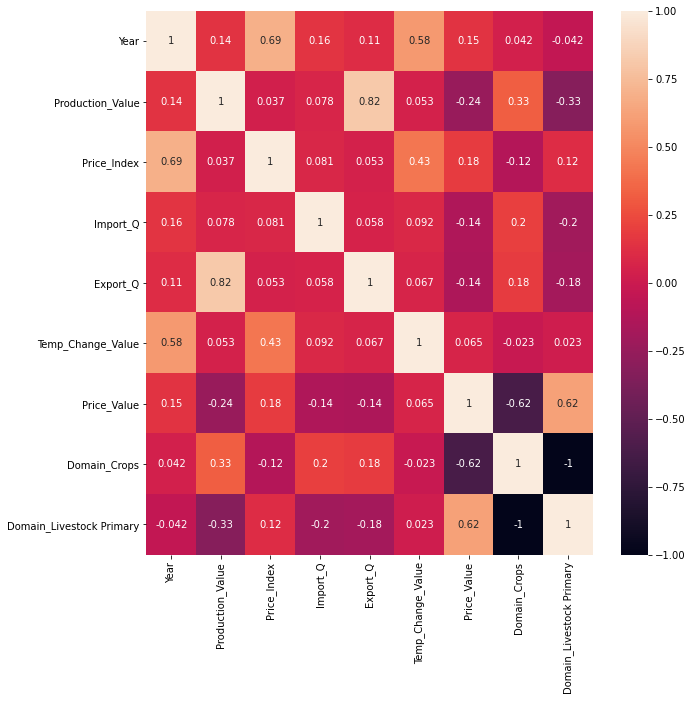

In [49]:
dfc1=df6.corr()

plt.subplots(figsize=(10,10))
sns.heatmap(dfc1, annot=True)

In [50]:
x = df6.drop(columns='Price_Value')
y = df6['Price_Value']

In [51]:
x_train_E, x_test_E, y_train_E, y_test_E = train_test_split(x, y, test_size = .20, random_state = 42)

In [52]:
x_train_E.head()

,Year,Production_Value,Price_Index,Import_Q,Export_Q,Temp_Change_Value,Domain_Crops,Domain_Livestock Primary
434,2003,13499884.0,48.37,23.0,0.000000,0.653,1,0
360,2014,59188.0,92.27,3822338.0,703.000000,0.951,1,0
355,2013,160390.0,85.86,33.0,2569.000000,0.962,0,1
81,2010,8245320.0,93.88,0.0,528473.802817,1.107,1,0
838,2017,532000.0,131.81,25.0,409.000000,1.211,0,1


In [53]:
x_train_E.shape

(708, 8)

In [54]:
x_test_E.shape

(178, 8)

In [55]:
model_E = LinearRegression()

In [56]:
model_E.fit(x_train_E, y_train_E)

LinearRegression()

In [57]:
model_E.predict(x_test_E)

array([-4.31815272e+01,  3.13203559e+03,  2.72193751e+03,  4.77526476e+01,
        2.83904415e+03,  2.14702669e+03,  2.88667959e+03,  2.68986677e+03,
        4.50404676e+02,  2.59993298e+03,  3.14921289e+03,  5.86892462e+02,
        2.31605251e+02,  1.42077969e+02, -2.16650048e+01,  7.11805506e+02,
        1.97387307e+02,  2.89526549e+03,  4.33405974e+02,  2.17537562e+03,
        2.38850263e+03,  2.85289650e+03,  2.23318624e+03,  2.25622312e+03,
        4.32805859e+02, -3.53442166e+01,  2.70238979e+03,  5.97843592e+02,
        2.12779665e+03,  1.37233630e+02,  2.48843979e+03,  2.73164316e+03,
        2.97969552e+03,  2.50824913e+03,  2.18919765e+03,  1.10241946e+03,
        2.80902007e+03,  9.67180561e+01,  2.27346417e+03,  2.54134602e+03,
        2.55728318e+03,  7.22250042e+02,  7.95745308e+02,  3.08248488e+03,
        6.15509661e+02,  7.13640473e+02,  3.02025735e+03,  2.89144317e+03,
        2.13660087e+03,  4.79075010e+02,  2.78660849e+03,  2.80525023e+03,
       -1.18029507e+02,  

In [58]:
model_E.intercept_

-173543.20010289003

In [59]:
model_E.coef_

array([ 8.74142516e+01, -7.21038840e-06, -1.85723192e+00, -9.19922134e-05,
        6.03548131e-06, -4.76247635e+02, -1.06120877e+03,  1.06120877e+03])

In [60]:
x_train_E.columns

Index(['Year', 'Production_Value', 'Price_Index', 'Import_Q', 'Export_Q',
       'Temp_Change_Value', 'Domain_Crops', 'Domain_Livestock Primary'],
      dtype='object')

In [61]:
pd.DataFrame(index= x_train_E.columns, data = model_E.coef_, columns=['Coefficient'])

,Coefficient
Year,87.414252
Production_Value,-0.000007
Price_Index,-1.857232
Import_Q,-0.000092
Export_Q,0.000006
Temp_Change_Value,-476.247635
Domain_Crops,-1061.208767
Domain_Livestock Primary,1061.208767


In [62]:
# x_train.head()

In [63]:
model_E.predict([[2020,1928000,70,456,703,1.2,1,0]])

array([1256.93667598])

In [64]:
# model.predict([[2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

In [65]:
# sm_model = OLS(y_train, sm.add_constant(x_train))

In [66]:
# result = sm_model.fit()

In [67]:
# result.summary()

In [68]:
pred_train_E = model_E.predict(x_train_E)

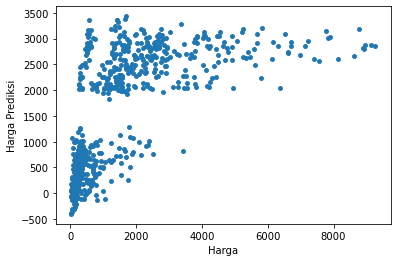

In [69]:
plt.scatter(y_train_E, pred_train_E, s=15)

plt.xlabel('Harga')
plt.ylabel('Harga Prediksi')

plt.show()

In [70]:
pred_test_E = model_E.predict(x_test_E)

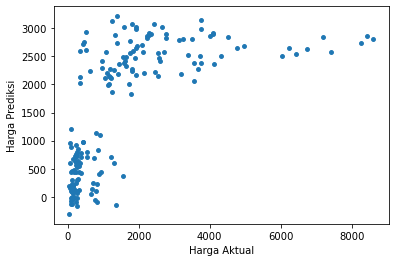

In [71]:
plt.scatter(y_test_E, pred_test_E, s=15)

plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')

plt.show()

In [72]:
pred_train_E = model_E.predict(x_train_E) ### Data Prediksi Model (Training)

MAE_train_E = median_absolute_error(y_train_E, pred_train_E)

MSE_train_E = mean_squared_error(y_train_E, pred_train_E)

RMSE_train_E = np.sqrt(MSE_train_E)

R2_train_E = r2_score(y_train_E, pred_train_E)

In [73]:
print("Hasil Evaluasi Data Training")
print("Nilai MAE : ", MAE_train_E)
print("Nilai MSE : ", MSE_train_E)
print("Nilai RMSE : ", RMSE_train_E)
print("Nilai R2 : ", R2_train_E)

Hasil Evaluasi Data Training
Nilai MAE :  498.7465051800857
Nilai MSE :  1747824.1374444284
Nilai RMSE :  1322.053000996718
Nilai R2 :  0.4302542158548863


In [74]:
pred_test_E = model_E.predict(x_test_E)

MAE_test_E = median_absolute_error(y_test_E, pred_test_E)

MSE_test_E = mean_squared_error(y_test_E, pred_test_E)

RMSE_test_E = np.sqrt(MSE_test_E)

R2_test_E = r2_score(y_test_E, pred_test_E)

In [75]:
print("Hasil Evaluasi Data Testing ")
print("Nilai MAE : ", MAE_test_E)
print("Nilai MSE : ", MSE_test_E)
print("Nilai RMSE : ", RMSE_test_E)
print("Nilai R2 : ", R2_test_E)

Hasil Evaluasi Data Testing 
Nilai MAE :  550.6918014469848
Nilai MSE :  1828316.2142696127
Nilai RMSE :  1352.1524375119889
Nilai R2 :  0.4277942015480526


In [76]:
model_E = model_E.best_estimator_

AttributeError: 'LinearRegression' object has no attribute 'best_estimator_'

In [ ]:
joblib.dump(model_E, 'Model_LR_PRICE')

In [ ]:
poli = PolynomialFeatures(degree=15, include_bias=False, interaction_only = True)

In [ ]:
X_poli = poli.fit_transform(x)

X_poli[0]

In [ ]:
X_poli.shape

In [ ]:
df_1 = pd.DataFrame(data = X_poli, columns = np.arange(255))

In [ ]:
df_All = pd.concat([df6, df_1], axis=1)

In [ ]:
df_All.head()

In [ ]:
df_All.drop(columns=[0,1,2,3,4,5,6,7], inplace=True)

In [ ]:
X = df_All.drop(columns='Price_Value')  ### Features / Soal
y = df_All['Price_Value'] ### Target / Jawaban

X_train_poli, X_test_poli, y_train_poli, y_test_poli = train_test_split(X, y, test_size = .20, random_state = 666)

In [ ]:
model_poli = LinearRegression()

In [ ]:
model_poli.fit(X_train_poli, y_train_poli)

In [ ]:
poli_test = model_poli.predict(X_test_poli)

In [ ]:
MAE_poli = median_absolute_error(y_test_poli, poli_test)

In [ ]:
MSE_poli = mean_squared_error(y_test_poli, poli_test)

In [ ]:
RMSE_poli = np.sqrt(MSE_poli)

In [ ]:
R2_poli = r2_score(y_test_poli, poli_test)

In [ ]:
data = {
    "Linreg" : [MAE_test_E, MSE_test_E, RMSE_test_E, R2_test_E],
    "Polynomial_degree" : [MAE_poli, MSE_poli, RMSE_poli, R2_poli]
}

In [ ]:
pd.DataFrame(data=data, index=['MAE', 'MSE', 'RMSE', 'R2'])

In [ ]:
scaling = RobustScaler()

In [ ]:
X_scaled = scaling.fit_transform(X)

In [ ]:
X = X_scaled
y = df6['Price_Value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [ ]:
model_scaled = LinearRegression()

In [ ]:
model_scaled.fit(X_train, y_train)

In [ ]:
pred_scaled = model_scaled.predict(X_test)

In [ ]:
MAE_scaled = median_absolute_error(y_test, pred_scaled)

MSE_scaled = mean_squared_error(y_test, pred_scaled)

RMSE_scaled = np.sqrt(MSE_scaled)

R2_scaled = r2_score(y_test, pred_scaled)

In [ ]:
print("Hasil Evaluation Matrix : ")
print("MAE : ", MAE_scaled)
print("MSE : ", MSE_scaled)
print("RMSE : ", RMSE_scaled)
print("R2 : ", R2_scaled)

In [ ]:
data = [0.000001, 0.005,0.01, 0.05, 0.1, 0.12, 0.5, 0.7, 1, 10, 15, 20, 50, 100, 110, 115, 120, 125, 150, 175, 200,225,250,275,300]
eva = []
for i in data:
    model_Ridge = Ridge(alpha = i)
    model_Ridge.fit(x_train_E, y_train_E)
    result=model_Ridge.score(x_test_E, y_test_E)
    eva.append(result)
    
eva    

In [ ]:
data_L = [0.000001, 0.005,0.01, 0.05, 0.1, 0.12, 0.5, 0.7, 1, 10, 15, 20, 50, 100, 125, 150, 175, 200]
eva_L = []
for i in data:
    model_Lasso = Ridge(alpha = i)
    model_Lasso.fit(x_train_E, y_train_E)
    result=model_Lasso.score(x_test_E, y_test_E)
    eva_L.append(result)
    
eva_L

In [ ]:
model_enet=ElasticNet(l1_ratio=0.00001, alpha=0.000001)

In [ ]:
model_enet.fit(x_train_E, y_train_E)

In [ ]:
model_enet.score(x_test_E, y_test_E)

In [ ]:
# KNN

In [ ]:
base_KNN = KNeighborsRegressor()

In [ ]:
base_KNN.fit(x_train_E, y_train_E)

In [ ]:
y_baseKNN = base_KNN.predict(x_test_E)

In [ ]:
r2_base_KNN = r2_score(y_test_E, y_baseKNN)
r2_base_KNN

In [ ]:
MAE_base_KNN = median_absolute_error(y_test_E, y_baseKNN)

In [ ]:
MSE_base_KNN = mean_squared_error(y_test_E, y_baseKNN)

In [ ]:
RMSE_base_KNN = np.sqrt(MSE_base_KNN)


In [ ]:
print("Hasil Evaluasi Data Testing ")
print("Nilai MAE : ", MAE_base_KNN)
print("Nilai MSE : ", MSE_base_KNN)
print("Nilai RMSE : ", RMSE_base_KNN)
print("Nilai R2 : ", r2_base_KNN)

In [ ]:
KNN_tuned = KNeighborsRegressor()

In [ ]:
param_KNN = {"n_neighbors" : [5, 15, 25, 35, 75],
            "weights" : ["uniform", "distance"],
            "p" : [1,2]}

In [ ]:
model_KNN = GridSearchCV(estimator=KNN_tuned, param_grid=param_KNN, n_jobs = -1, cv = 5, verbose=1 )

In [ ]:
model_KNN.fit(x_train_E, y_train_E)

In [ ]:
model_KNN.best_params_

In [ ]:
model_KNN.best_score_

In [ ]:
model_KNN.best_estimator_

In [ ]:
KNN_Tuned = model_KNN.best_estimator_

In [ ]:
y_tunedKNN = KNN_Tuned.predict(x_test_E)

In [ ]:
r2_tuned_KNN = r2_score(y_test, y_tunedKNN)

MAE_tuned_KNN = mean_absolute_error(y_test, y_tunedKNN)

MSE_tuned_KNN = mean_squared_error(y_test, y_tunedKNN)

RMSE_tuned_KNN = np.sqrt(MSE_tuned_KNN)

In [ ]:
print("Hasil Evaluasi Data Testing ")
print("Nilai MAE : ", MAE_tuned_KNN)
print("Nilai MSE : ", MSE_tuned_KNN)
print("Nilai RMSE : ", RMSE_tuned_KNN)
print("Nilai R2 : ", r2_tuned_KNN)

In [ ]:
joblib.dump(KNN_Tuned, 'Model_KNN_PRICE')

In [ ]:
base_RF = RandomForestRegressor()

In [ ]:
base_RF.fit(x_train_E, y_train)

In [ ]:
y_baseRF = base_RF.predict(x_test_E)

In [ ]:
r2_base_RF = r2_score(y_test_E, y_baseRF)

MAE_base_RF = median_absolute_error(y_test_E, y_baseRF)

MSE_base_RF = mean_squared_error(y_test_E, y_baseRF)

RMSE_base_RF = np.sqrt(MSE_base_RF)

In [ ]:
print("Hasil Evaluasi Data Testing ")
print("Nilai MAE : ", MAE_base_RF)
print("Nilai MSE : ", MSE_base_RF)
print("Nilai RMSE : ", RMSE_base_RF)
print("Nilai R2 : ", r2_base_RF)

In [ ]:
RF = RandomForestRegressor()

In [ ]:
param_RF = {"n_estimators" : [100, 200, 500, 700, 1000],
          "max_depth" : [None, 5, 7, 9, 20, 25],
          "min_samples_split" : [2, 9, 15, 25],
          "min_samples_leaf" : [1, 2, 5, 10],
          "max_features" : [None, .8, .7, .6]}

In [ ]:
model_RF = GridSearchCV(estimator=RF, param_grid=param_RF, cv = 4, n_jobs=-1, verbose=1)

In [ ]:
model_RF.fit(x_train_E, y_train_E)

In [ ]:
model_RF.best_params_

In [ ]:
RF_tuned = model_RF.best_estimator_

In [ ]:
y_tunedRF = RF_tuned.predict(x_test_E)

In [ ]:
r2_tuned_RF = r2_score(y_test_E, y_tunedRF)

MAE_tuned_RF = mean_absolute_error(y_test_E, y_tunedRF)

MSE_tuned_RF = mean_squared_error(y_test_E, y_tunedRF)

RMSE_tuned_RF = np.sqrt(MSE_tuned_RF)

In [ ]:
print("Hasil Evaluasi Data Testing ")
print("Nilai MAE : ", MAE_tuned_RF)
print("Nilai MSE : ", MSE_tuned_RF)
print("Nilai RMSE : ", RMSE_tuned_RF)
print("Nilai R2 : ", r2_tuned_RF)

In [ ]:
joblib.dump(RF_tuned, 'Model_RF_PRICE')

In [ ]:
joblib.dumb()